## Loading the Breast Cancer Wisconsin dataset

In [2]:
import pandas as pd

df = pd.read_csv(
     'https://archive.ics.uci.edu/ml/'
     'machine-learning-databases'
     '/breast-cancer-wisconsin/wdbc.data',
     header=None)

In [3]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [5]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:,2:].values
y = df.loc[:,1].values

le = LabelEncoder()
le.fit_transform(y)
print(le.classes_)

['B' 'M']


In [7]:
type(X)

numpy.ndarray

In [9]:
## check transform, 'malignant' tumors and 'benign' tumors
le.transform(['M','B'])

array([1, 0])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=1)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

lr_model = LogisticRegression(random_state=1,solver='lbfgs')
pipe_lr = make_pipeline(StandardScaler(),PCA(n_components=2),lr_model)
pipe_lr.fit(X_train,y_train)
y_pred = pipe_lr.predict(X_test)
print("Test Accuracy : %.3f" % pipe_lr.score(X_test,y_test))

Test Accuracy : 0.956


## Usingk-fold cross-validation to assess model performance

In [36]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k, (train,test) in enumerate(kfold):
    pipe_lr.fit(X_train[train],y_train[train])
    score = pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)
    # print("Fold: %2d,  Class dist.: %s,  ACC:%.3f" % (k+1, str(np.bincount(y_train[train])), score))
    ## error , np.bincount , note : pipe_lr['standardscaler']
    print("Fold: %2d,  ACC:%.3f" % (k+1, score))


Fold:  1,  ACC:0.935
Fold:  2,  ACC:0.935
Fold:  3,  ACC:0.957
Fold:  4,  ACC:0.957
Fold:  5,  ACC:0.935
Fold:  6,  ACC:0.956
Fold:  7,  ACC:0.978
Fold:  8,  ACC:0.933
Fold:  9,  ACC:0.956
Fold: 10,  ACC:0.956


In [39]:
print("CV accuray : %.3f, std : +/- %.3f" % (np.mean(scores),np.std(scores)))

CV accuray : 0.950, std : +/- 0.014


In [40]:
## cross validation score , use sklearn

from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=-1)   # stratified k-fold cross validation
print("CV accuray : %.3f, std : +/- %.3f" % (np.mean(scores),np.std(scores)))
                 

CV accuray : 0.950, std : +/- 0.014


## Debugging algorithms with learning and validation curves

### Diagnosing bias and variance problemns with learning curves

In [42]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',
                        random_state=1,
                        solver='lbfgs',
                        max_iter=10000))

train_sizes, train_scores, test_scores = \
                learning_curve(estimator=pipe_lr,
                X=X_train,
                y=y_train,
                train_sizes=np.linspace(0.1,1.0,10),
                cv=10,
                n_jobs=-1)                        

In [44]:
train_sizes

array([ 40,  81, 122, 163, 204, 245, 286, 327, 368, 409])

In [47]:
train_scores.shape, test_scores.shape

((10, 10), (10, 10))

In [48]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [49]:
train_mean.shape, train_std.shape

((10,), (10,))

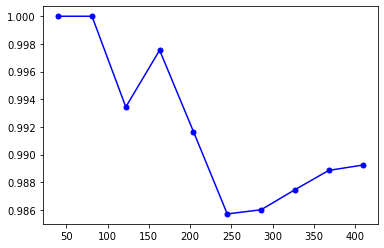

In [50]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')

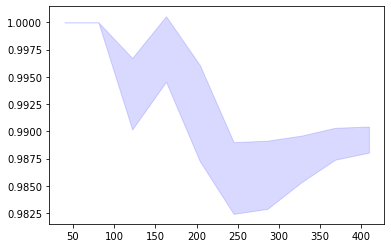

In [51]:
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='blue')

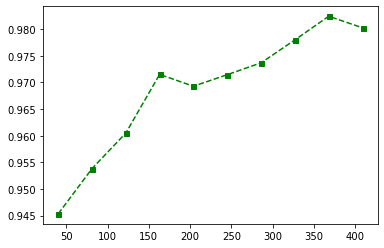

In [53]:
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')

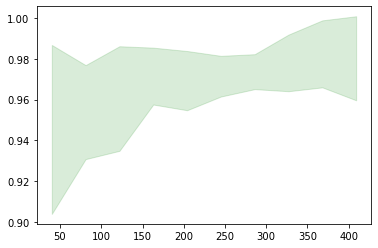

In [55]:
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')

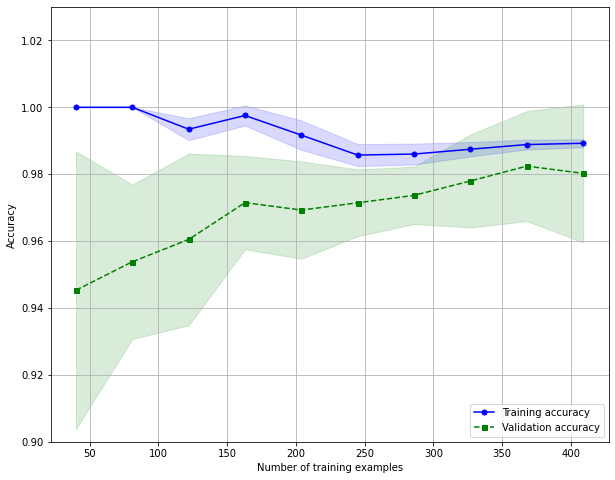

In [63]:
plt.figure(figsize=(10,8))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')



plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.9,1.03])
plt.show()

### Addressing over- and underfitting with validation curves